# BBH Disks (Cowling with 12 levels of refinement)

In [1]:
using Plots
include("../../Utils/misc.jl")

Main.Misc

## Scaling

### bbhDisk-n256-v1

M/day
G64: [230.49884742314683, 345.76169690752715, 434.76824515069785, 412.3098276338026]
G128: [265.00912587578864, 376.5848621163997, 452.4414323484922, 425.77149591584924]
G256: [247.70784419419277, 360.3532857115918, 418.1459975984331, 410.99946525876027]
Gtheory: [268.841604886095, 371.20334812115226, 440.344847360272, 456.67750907462397]
Zcs/sec
G64: [3.19645625e7, 4.78995125e7, 6.0250559375e7, 5.718725e7]
G128: [3.67014125e7, 5.218935625e7, 6.26027625e7, 5.9090740625e7]
G256: [3.4458046875e7, 4.99724e7, 5.867264375e7, 5.7015859375e7]
Gtheory: [3.72947875e7, 5.154395e7, 6.098025e7, 6.3349903125e7]


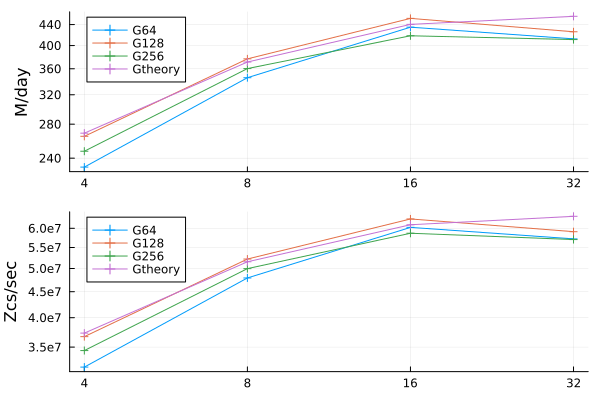

In [2]:
let patt_dirss = [
        ([
            (r"Cow_L12_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_L12_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_L12_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_L12_Gtheory-N\d+-MPI\d+_r0000", "Gtheory"),
            #(r"Cow_L12_G256x320x96-N\d+-MPI\d+_r0000", "G256x320x96"),
            #(r"Cow_L12_GnGPU-N\d+-MPI\d+_r0000", "GnGPU"),
        ], "../data/bbhDisk/bbhDisk-n256-v1", :cross),
    ]
    # Plot M/day
    plt1 = plot(ylabel="M/day", xscale=:log10, yscale=:log10)
    xs = [4, 8, 16, 32]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [240, 280, 320, 360, 400, 440]
    yticks!(plt1, ys, [string(n) for n in ys])
    println("M/day")
    Misc.plot_scaling(plt1, patt_dirss; option="TotalComputeTime")
    
    # Plot Zcs/sec
    plt2 = plot(ylabel="Zcs/sec", xscale=:log10, yscale=:log10)
    xs = [4, 8, 16, 32]
    xticks!(plt2, xs, [string(n) for n in xs])
    ys = [3.5e7, 4e7, 4.5e7, 5e7, 5.5e7, 6e7]
    yticks!(plt2, ys, [string(n) for n in ys])
    println("Zcs/sec")
    Misc.plot_scaling(plt2, patt_dirss; option="ZcsPerSecond")

    # Sum
    plt = plot(plt1, plt2, layout=(2,1))
    display(plt)
end

### bbhDisk-n256-v2

M/day
G64: [220.31947851090146, 325.16133363231086, 405.6088188370744, 420.123989280564]
G128: [236.89499438329608, 356.942941071663, 440.9108364505256, 351.41893898687056]
G256: [246.76763875623453, 373.2591607475137, 430.24309814508166, 433.077564036494]
Gtheory: [251.93784449565476, 353.3231796891094, 416.9121068586077, 414.06949778069634]
Zcs/sec
G64: [3.2672684375e7, 4.83809125e7, 6.02908125e7, 6.2391615625e7]
G128: [3.52576375e7, 5.3022140625e7, 6.5473040625e7, 5.633955625e7]
G256: [3.6645628125e7, 5.54640125e7, 6.3895525e7, 6.431408125e7]
Gtheory: [3.7378684375e7, 5.2483609375e7, 6.188589375e7, 6.1547471875e7]


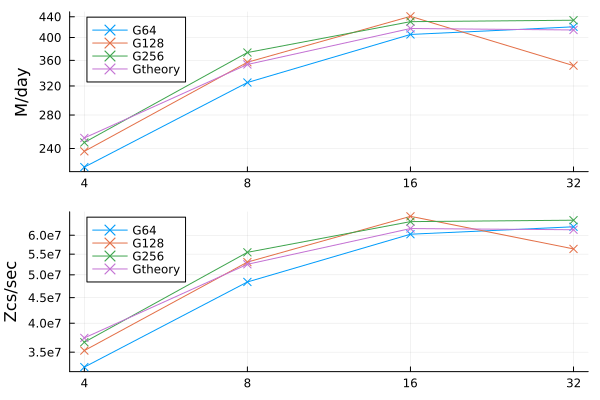

In [3]:
let patt_dirss = [
        ([
            (r"Cow_L12_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_L12_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_L12_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_L12_Gtheory-N\d+-MPI\d+_r0000", "Gtheory"),
        ], "../data/bbhDisk/bbhDisk-n256-v2", :xcross),
    ]
    # Plot M/day
    plt1 = plot(ylabel="M/day", xscale=:log10, yscale=:log10)
    xs = [4, 8, 16, 32]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [240, 280, 320, 360, 400, 440]
    yticks!(plt1, ys, [string(n) for n in ys])
    println("M/day")
    Misc.plot_scaling(plt1, patt_dirss; option="TotalComputeTime")
    
    # Plot Zcs/sec
    plt2 = plot(ylabel="Zcs/sec", xscale=:log10, yscale=:log10)
    xs = [4, 8, 16, 32]
    xticks!(plt2, xs, [string(n) for n in xs])
    ys = [3.5e7, 4e7, 4.5e7, 5e7, 5.5e7, 6e7]
    yticks!(plt2, ys, [string(n) for n in ys])
    println("Zcs/sec")
    Misc.plot_scaling(plt2, patt_dirss; option="ZcsPerSecond")

    # Sum
    plt = plot(plt1, plt2, layout=(2,1))
    display(plt)
end

### bbhDisk-n360

M/day
G64: [218.47513439744557, 304.65519692628015, 291.2265243412139]
G128: [223.70747593500906, 295.7248573101065, 364.77906068825314]
G256: [246.81685870610642, 245.52381052953945, 285.9143232623172]
Gtheory: [287.97736807540014, 300.9453567367427, 382.42224697788197]
Zcs/sec
G64: [5.5624321875e7, 7.762475e7, 8.196465625e7]
G128: [5.696583125e7, 7.5337040625e7, 9.3074975e7]
G256: [6.2871653125e7, 7.5392253125e7, 8.130581875e7]
Gtheory: [7.3320315625e7, 7.6670728125e7, 9.7472509375e7]


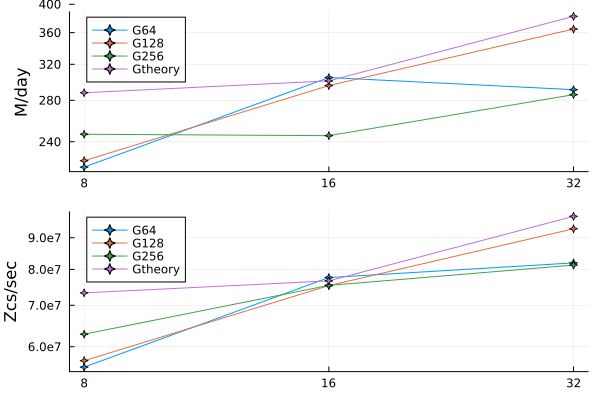

In [4]:
let patt_dirss = [
        ([
            (r"Cow_L12_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_L12_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_L12_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_L12_Gtheory-N\d+-MPI\d+_r0000", "Gtheory"),
        ], "../data/bbhDisk/bbhDisk-n320", :star4),
    ]
    # Plot M/day
    plt1 = plot(ylabel="M/day", xscale=:log10, yscale=:log10)
    xs = [4, 8, 16, 32]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [240, 280, 320, 360, 400, 440]
    yticks!(plt1, ys, [string(n) for n in ys])
    println("M/day")
    Misc.plot_scaling(plt1, patt_dirss; option="TotalComputeTime")
    
    # Plot Zcs/sec
    plt2 = plot(ylabel="Zcs/sec", xscale=:log10, yscale=:log10)
    xs = [4, 8, 16, 32]
    xticks!(plt2, xs, [string(n) for n in xs])
    ys = [6e7, 7e7, 8e7, 9e7]
    yticks!(plt2, ys, [string(n) for n in ys])
    println("Zcs/sec")
    Misc.plot_scaling(plt2, patt_dirss; option="ZcsPerSecond")

    # Sum
    plt = plot(plt1, plt2, layout=(2,1))
    display(plt)
end

### In Sum

M/day
G64: [230.49884742314683, 345.76169690752715, 434.76824515069785, 412.3098276338026]
G128: [265.00912587578864, 376.5848621163997, 452.4414323484922, 425.77149591584924]
G256: [247.70784419419277, 360.3532857115918, 418.1459975984331, 410.99946525876027]
Gtheory: [268.841604886095, 371.20334812115226, 440.344847360272, 456.67750907462397]
G64: [220.31947851090146, 325.16133363231086, 405.6088188370744, 420.123989280564]
G128: [236.89499438329608, 356.942941071663, 440.9108364505256, 351.41893898687056]
G256: [246.76763875623453, 373.2591607475137, 430.24309814508166, 433.077564036494]
Gtheory: [251.93784449565476, 353.3231796891094, 416.9121068586077, 414.06949778069634]
G64: [218.47513439744557, 304.65519692628015, 291.2265243412139]
G128: [223.70747593500906, 295.7248573101065, 364.77906068825314]
G256: [246.81685870610642, 245.52381052953945, 285.9143232623172]
Gtheory: [287.97736807540014, 300.9453567367427, 382.42224697788197]
Zcs/sec
G64: [3.19645625e7, 4.78995125e7, 6.0250

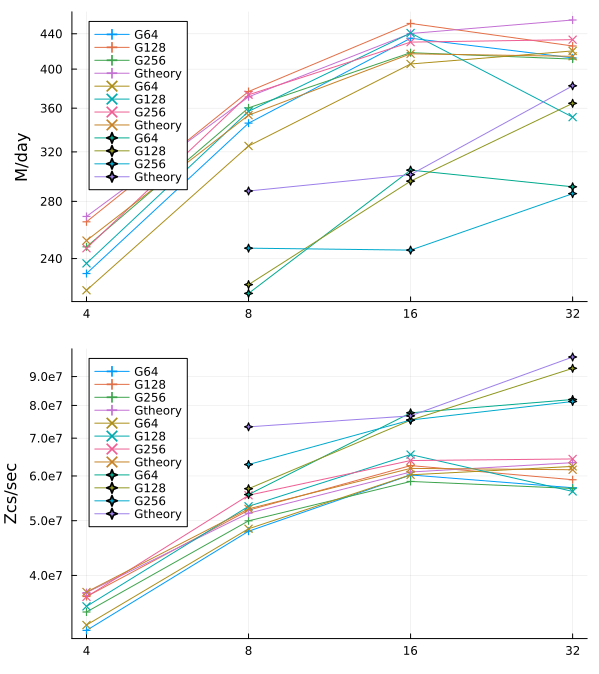

In [5]:
let patt_dirss = [
        ([
            (r"Cow_L12_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_L12_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_L12_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_L12_Gtheory-N\d+-MPI\d+_r0000", "Gtheory"),
            #(r"Cow_L12_G256x320x96-N\d+-MPI\d+_r0000", "G256x320x96"),
            #(r"Cow_L12_GnGPU-N\d+-MPI\d+_r0000", "GnGPU"),
        ], "../data/bbhDisk/bbhDisk-n256-v1", :cross),
        ([
            (r"Cow_L12_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_L12_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_L12_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_L12_Gtheory-N\d+-MPI\d+_r0000", "Gtheory"),
        ], "../data/bbhDisk/bbhDisk-n256-v2", :xcross),
        ([
            (r"Cow_L12_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_L12_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_L12_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_L12_Gtheory-N\d+-MPI\d+_r0000", "Gtheory"),
        ], "../data/bbhDisk/bbhDisk-n320", :star4),
    ]
    # Plot M/day
    plt1 = plot(ylabel="M/day", xscale=:log10, yscale=:log10)
    xs = [4, 8, 16, 32]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [240, 280, 320, 360, 400, 440]
    yticks!(plt1, ys, [string(n) for n in ys])
    println("M/day")
    Misc.plot_scaling(plt1, patt_dirss; option="TotalComputeTime")
    
    # Plot Zcs/sec
    plt2 = plot(ylabel="Zcs/sec", xscale=:log10, yscale=:log10)
    xs = [4, 8, 16, 32]
    xticks!(plt2, xs, [string(n) for n in xs])
    ys = [4e7, 5e7, 6e7, 7e7, 8e7, 9e7]
    yticks!(plt2, ys, [string(n) for n in ys])
    println("Zcs/sec")
    Misc.plot_scaling(plt2, patt_dirss; option="ZcsPerSecond")

    # Sum
    plt = plot(plt1, plt2, layout=(2,1), size = (600, 675))
    display(plt)
end

## Speed

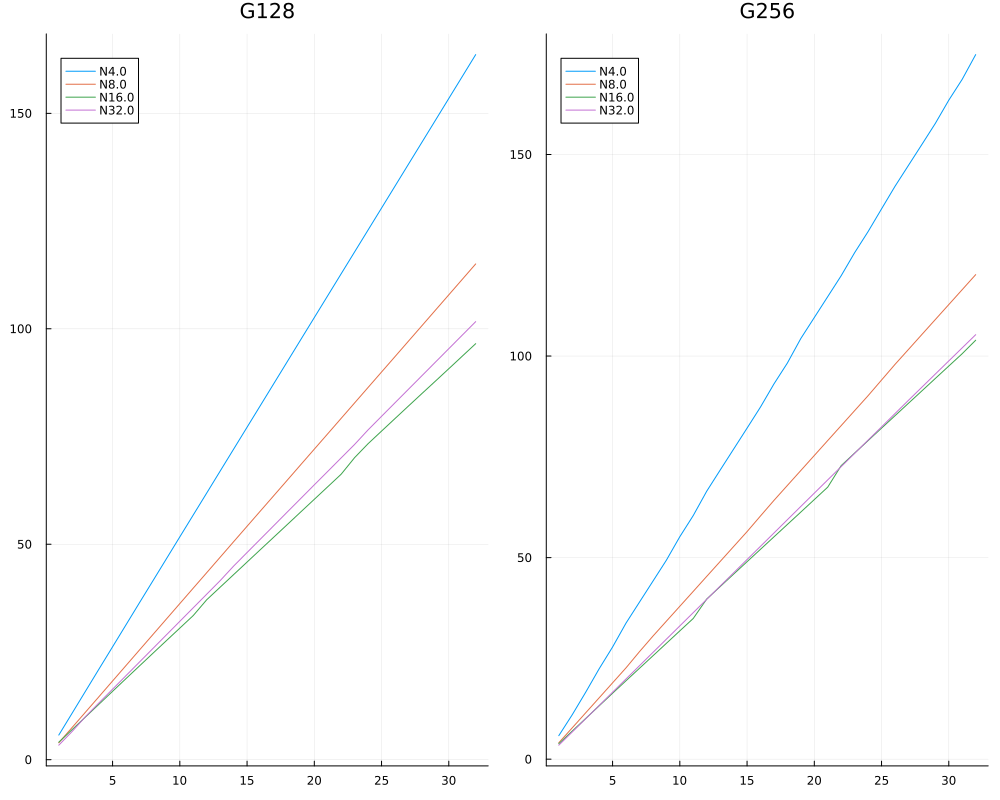

In [6]:
let patt_dirss = [
        ([
            #(r"Cow_L12_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_L12_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_L12_G256-N\d+-MPI\d+_r0000", "G256"),
            #(r"Cow_L12_Gtheory-N\d+-MPI\d+_r0000", "Gtheory"),
            #(r"Cow_L12_G256x320x96-N\d+-MPI\d+_r0000", "G256x320x96"),
            #(r"Cow_L12_GnGPU-N\d+-MPI\d+_r0000", "GnGPU"),
        ], "../data/bbhDisk/bbhDisk-n256-v1", :cross),
    ]
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = Misc.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[3], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,2), size=(1000, 800))
    display(plt)
end

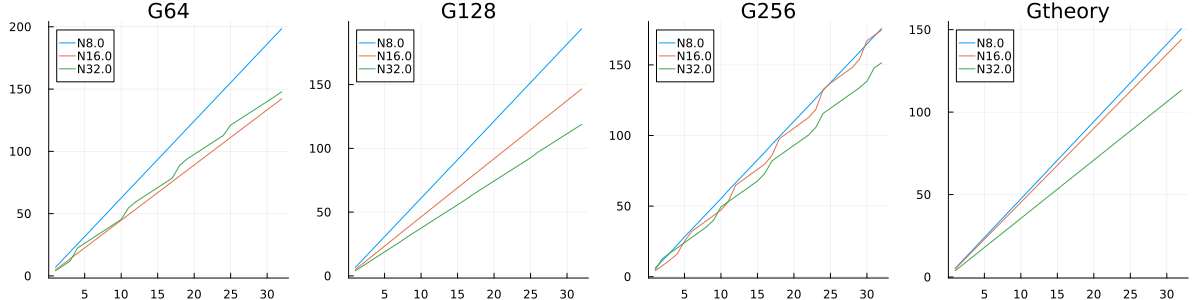

In [7]:
let patt_dirss = [
        ([
            (r"Cow_L12_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_L12_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_L12_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_L12_Gtheory-N\d+-MPI\d+_r0000", "Gtheory"),
        ], "../data/bbhDisk/bbhDisk-n320", :star4),
    ]
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = Misc.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[3], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,4), size=(1200, 300))
    display(plt)
end